Kelompok 2
Andi Alifsyah Dyasham (195150401111048)

1.   Andi Alifsyah Dyasham (195150401111048)
1.   Alfian Hakim (195150400111021)


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AndyAlyf/DatasetRepos/master/Data%20Science%20Change%20Jobs/aug_train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### Pre Processing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8955 entries, 1 to 19155
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             8955 non-null   int64  
 1   city                    8955 non-null   object 
 2   city_development_index  8955 non-null   float64
 3   gender                  8955 non-null   object 
 4   relevent_experience     8955 non-null   object 
 5   enrolled_university     8955 non-null   object 
 6   education_level         8955 non-null   object 
 7   major_discipline        8955 non-null   object 
 8   experience              8955 non-null   object 
 9   company_size            8955 non-null   object 
 10  company_type            8955 non-null   object 
 11  last_new_job            8955 non-null   object 
 12  training_hours          8955 non-null   int64  
 13  target                  8955 non-null   float64
dtypes: float64(2), int64(2), object(10)
mem

In [ ]:
lc = LabelEncoder()
pd.DataFrame({
    'city' : df.city.unique(),
    'city_categorical' : lc.fit_transform(df.city.unique())
})

,city,city_categorical
0,city_40,72
1,city_162,48
2,city_46,78
3,city_103,5
4,city_61,86
...,...,...
111,city_121,19
112,city_129,24
113,city_48,79
114,city_139,31


In [ ]:
pd.DataFrame({
    'enrolled_university' : df.enrolled_university.unique(),
    'enrolled_university_categorical' : lc.fit_transform(df.enrolled_university.unique())
})

,enrolled_university,enrolled_university_categorical
0,no_enrollment,2
1,Part time course,1
2,Full time course,0


In [ ]:
df.city = lc.fit_transform(df.city)
df.gender = lc.fit_transform(df.gender)
df.relevent_experience = lc.fit_transform(df.relevent_experience)
df.enrolled_university = lc.fit_transform(df.enrolled_university)
df.education_level = lc.fit_transform(df.education_level)
df.major_discipline = lc.fit_transform(df.major_discipline)
df.experience = lc.fit_transform(df.experience)
df.company_type = lc.fit_transform(df.company_type)
df.company_size = lc.fit_transform(df.company_size)
df.last_new_job = lc.fit_transform(df.last_new_job)

In [ ]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,72,0.776,1,1,2,0,5,6,4,5,4,47,0.0
4,666,48,0.767,1,0,2,1,5,21,4,1,3,8,0.0
7,402,78,0.762,1,0,2,0,5,4,7,5,4,18,1.0
8,27107,5,0.920,1,0,2,0,5,17,4,5,0,46,1.0
11,23853,5,0.920,1,0,2,0,5,15,6,5,0,108,0.0


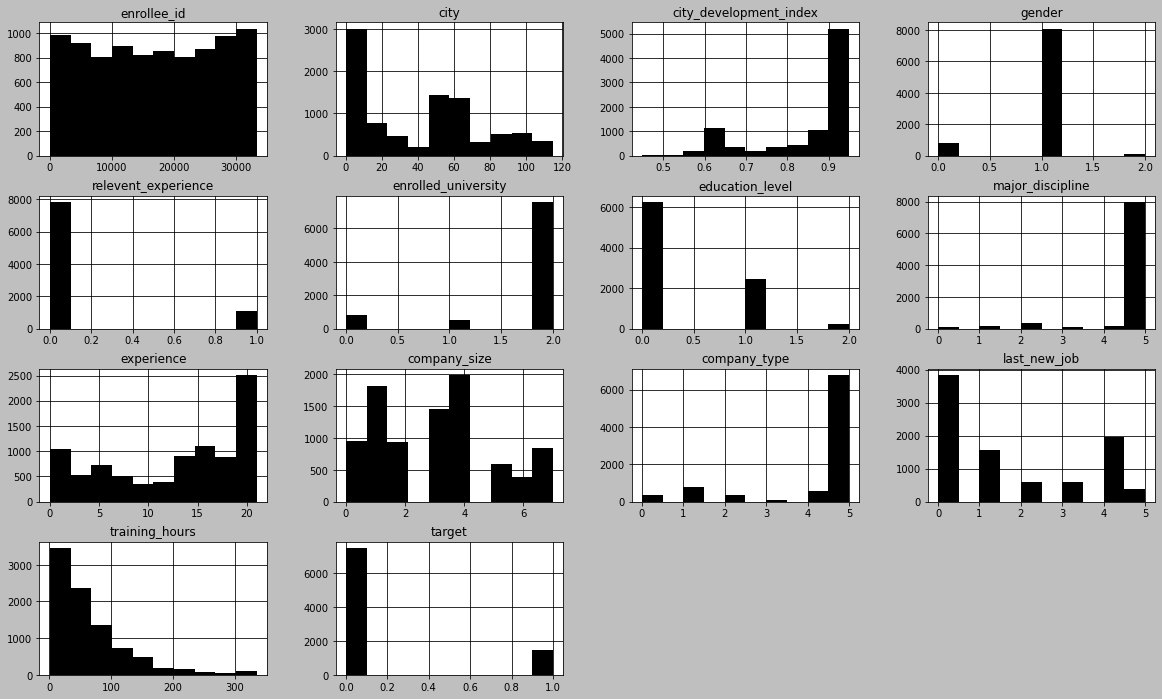

In [ ]:
plt.style.use("grayscale")
df.hist(figsize=(20,12))
plt.show()

In [ ]:
df.corr()["target"].sort_values()

city_development_index   -0.422097
enrolled_university      -0.090202
education_level          -0.036868
last_new_job             -0.036506
company_size             -0.021033
experience               -0.015698
training_hours           -0.012674
gender                    0.001219
company_type              0.004168
enrollee_id               0.035983
relevent_experience       0.036707
major_discipline          0.052459
city                      0.092650
target                    1.000000
Name: target, dtype: float64

## Function for run decision tree cross validation

In [ ]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, testCriterion, cv=10, scoring='accuracy',):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth,criterion=testCriterion)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

In [ ]:
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    plt.style.use("grayscale")
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.set_yticks([round(0.05*x,2) for x in range(10,21)])
    ax.legend()
    plt.show()

In [ ]:
# function for training and evaluating a tree
def run_single_tree(X_train, y_train, X_test, y_test, depth):
    model = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
    print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')
    return model, accuracy_train, accuracy_test

 ### Tanpa Feature Selection

In [ ]:
X  = df[df.columns[1:-1]]
Y  = df['target']

In [ ]:
X.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
1,72,0.776,1,1,2,0,5,6,4,5,4,47
4,48,0.767,1,0,2,1,5,21,4,1,3,8
7,78,0.762,1,0,2,0,5,4,7,5,4,18
8,5,0.920,1,0,2,0,5,17,4,5,0,46
11,5,0.920,1,0,2,0,5,15,6,5,0,108


In [ ]:
Y.head()

1     0.0
4     0.0
7     1.0
8     1.0
11    0.0
Name: target, dtype: float64

#### Modelling

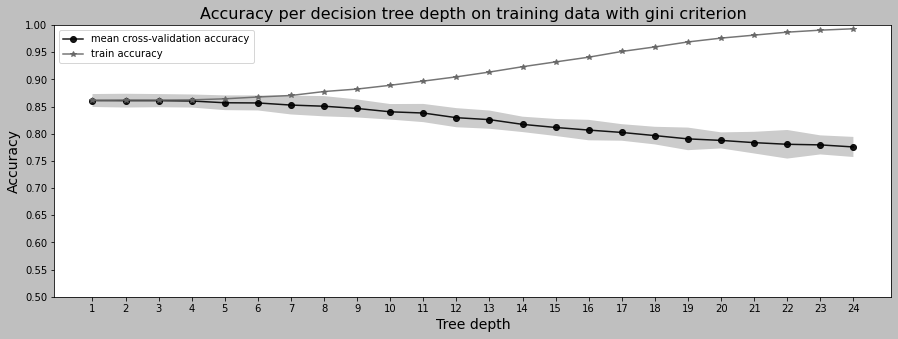

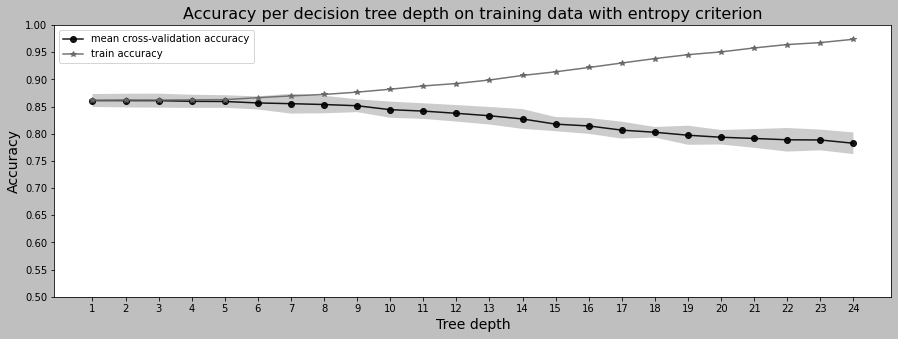

In [ ]:
# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X, Y, sm_tree_depths, 'gini')

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data with gini criterion')

sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X, Y,sm_tree_depths, 'entropy')
# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data with entropy criterion')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4) # 80% training and 20% test

clf = DecisionTreeClassifier(max_depth=5,criterion='entropy',max_leaf_nodes=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8587381351200447


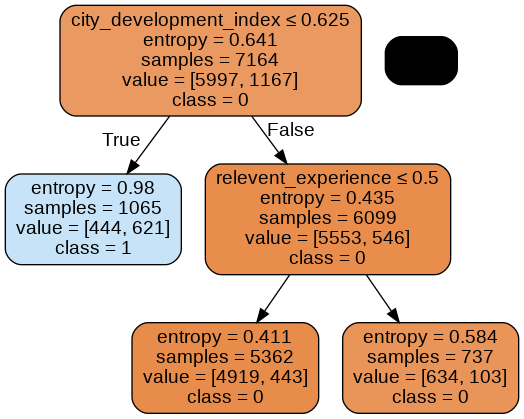

In [ ]:
#  Export image
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = df.columns[1:-1],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ds_1.png')
Image(graph.create_png())

 ### Dengan Feature Selection

In [ ]:
df.corr()["target"][(df.corr()["target"] < -0.05) | (df.corr()["target"] > 0.05)]

city                      0.092650
city_development_index   -0.422097
enrolled_university      -0.090202
major_discipline          0.052459
target                    1.000000
Name: target, dtype: float64

In [ ]:
new_column = df.corr()["target"][(df.corr()["target"] < -0.05) | (df.corr()["target"] > 0.05)][:-1].index.tolist()
new_column

['city', 'city_development_index', 'enrolled_university', 'major_discipline']

In [ ]:
X_new = df[new_column]
X_new.head()

,city,city_development_index,enrolled_university,major_discipline
1,72,0.776,2,5
4,48,0.767,2,5
7,78,0.762,2,5
8,5,0.920,2,5
11,5,0.920,2,5


#### Modelling

In [ ]:
# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_new, Y, sm_tree_depths,'gini')

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data with gini criterion')

sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_new, Y, sm_tree_depths,'gini')
# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data with entropy criterion')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2, random_state=4) # 80% training and 20% test

clf = DecisionTreeClassifier(max_depth=5,criterion='entropy')
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8587381351200447


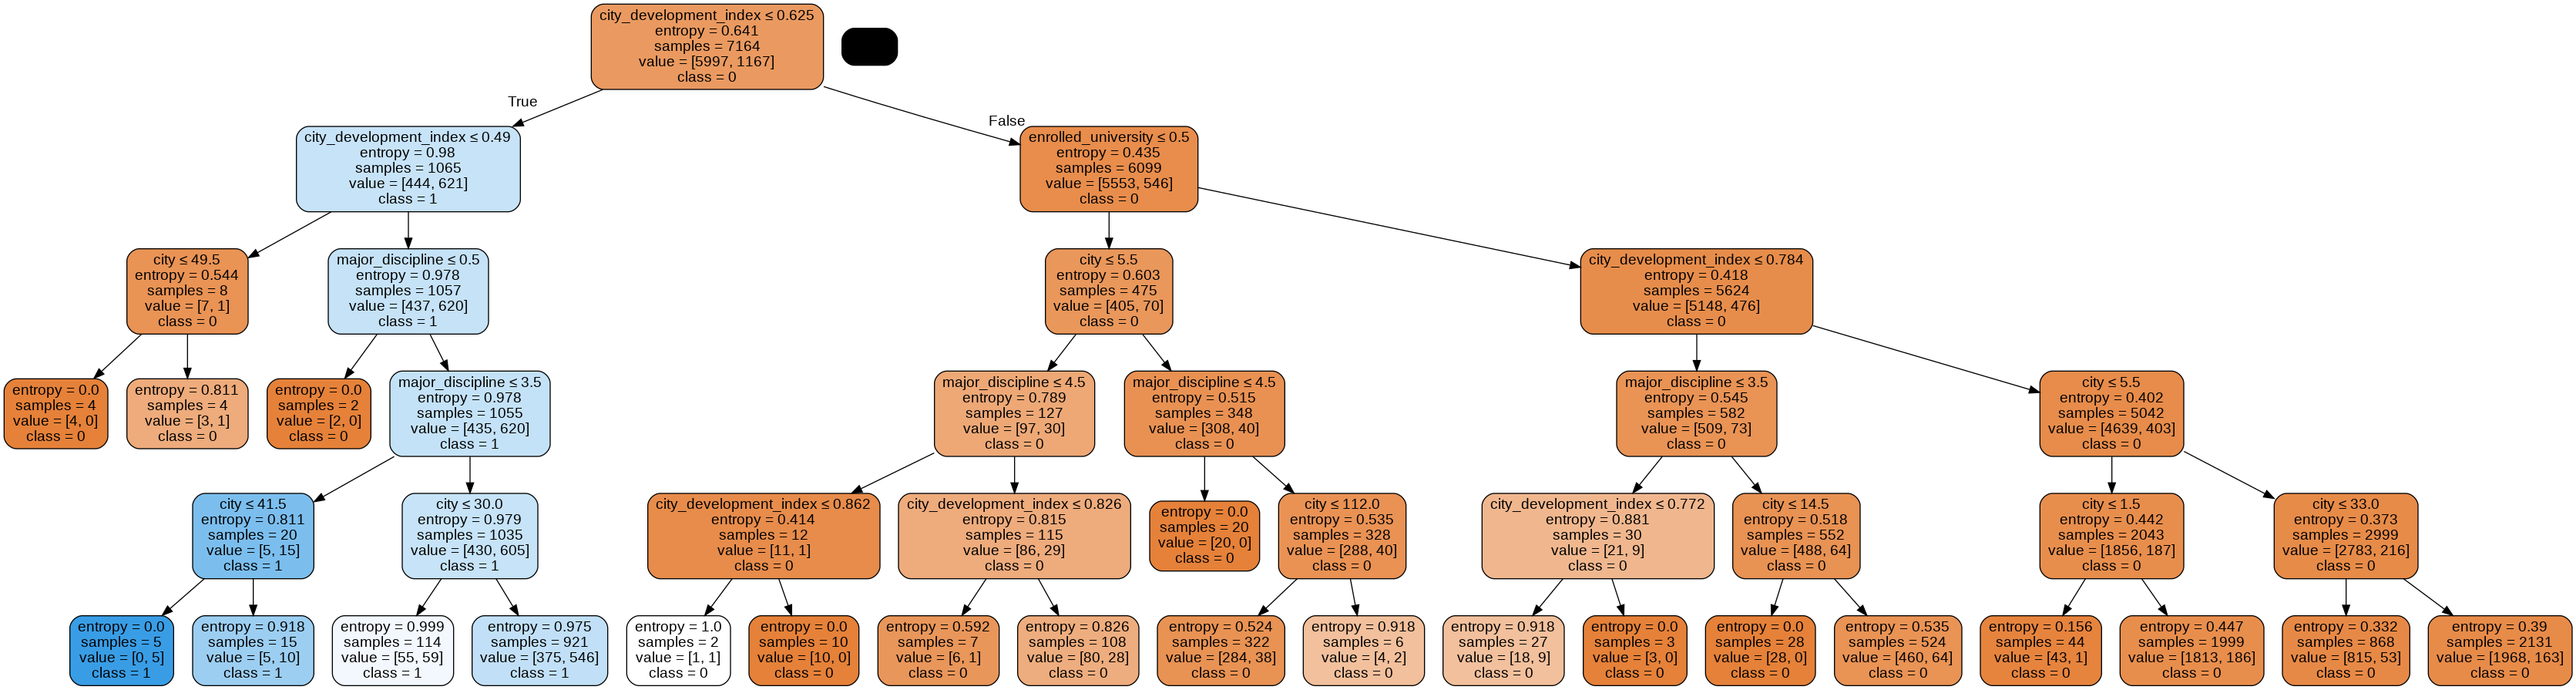

In [ ]:
#  Export image
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = new_column,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ds_2.png')
Image(graph.create_png())

## K Fold

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kf =KFold(n_splits=10, shuffle=True, random_state=4)

In [ ]:
Y  = df['target']

In [ ]:
score = cross_val_score(DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=2, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=5), X, Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.85267857 0.86383929 0.84151786 0.84933036 0.87611607 0.85363128
 0.85586592 0.87821229 0.86703911 0.8726257 ]
Average score: 0.86


In [ ]:
score = cross_val_score(DecisionTreeClassifier(), X, Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.73883929 0.77120536 0.77455357 0.77232143 0.78125    0.75530726
 0.77988827 0.77765363 0.77318436 0.76648045]
Average score: 0.77


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [ ]:
score = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.75592748 0.79079498 0.78800558 0.78242678 0.78631285 0.76675978
 0.76955307 0.78910615 0.76675978 0.76536313]
Average score: 0.78


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=5)
score = cross_val_score(DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=2, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=5), X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.83035714 0.88169643 0.86160714 0.875      0.890625   0.83035714
 0.84821429 0.87919463 0.85682327 0.84563758]
Average score: 0.86


In [ ]:
for i in np.arange(0.05, 0.55, 0.05):
    print(f'test_size: {"{:.2f}".format(i)}')
    X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=i, random_state=5)
    clf = DecisionTreeClassifier()
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

test_size: 0.05
Accuracy: 0.8415178571428571
test_size: 0.10
Accuracy: 0.8370535714285714
test_size: 0.15
Accuracy: 0.8474702380952381
test_size: 0.20
Accuracy: 0.8425460636515912
test_size: 0.25
Accuracy: 0.8459133541759715
test_size: 0.30
Accuracy: 0.8489021213248976
test_size: 0.35
Accuracy: 0.8558213716108453
test_size: 0.40
Accuracy: 0.8559463986599665
test_size: 0.45
Accuracy: 0.8600496277915632
test_size: 0.50
Accuracy: 0.8559624832514515


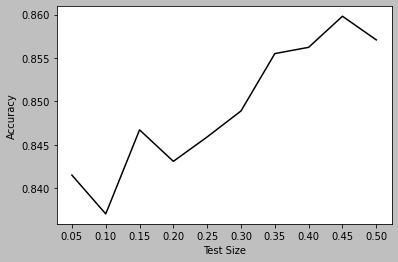

In [ ]:
accuracy = []

for k in np.arange(0.05, 0.55, 0.05):
    X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=k, random_state=5)
    clf = DecisionTreeClassifier()
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    accuracy.append(score)

plt.style.use("grayscale")
plt.plot(np.arange(0.05, 0.55, 0.05), accuracy)
plt.xticks(np.arange(0.05, 0.55, 0.05))
plt.xlabel("Test Size")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
for i in np.arange(0.05, 0.55, 0.05):
    print(f'test_size: {"{:.2f}".format(i)}')
    X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=i, random_state=5)
    clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=2, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=5)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

test_size: 0.05
Accuracy: 0.8348214285714286
test_size: 0.10
Accuracy: 0.8381696428571429
test_size: 0.15
Accuracy: 0.8497023809523809
test_size: 0.20
Accuracy: 0.8498045784477946
test_size: 0.25
Accuracy: 0.8517195176418044
test_size: 0.30
Accuracy: 0.854484555266096
test_size: 0.35
Accuracy: 0.8606060606060606
test_size: 0.40
Accuracy: 0.8615298715801228
test_size: 0.45
Accuracy: 0.8650124069478908
test_size: 0.50
Accuracy: 0.8622152746761947


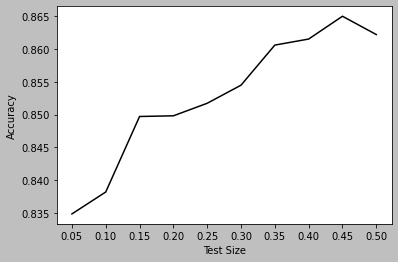

In [ ]:
accuracy = []

for k in np.arange(0.05, 0.55, 0.05):
    X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=k, random_state=5)
    clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=2, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=5)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    accuracy.append(score)

plt.style.use("grayscale")
plt.plot(np.arange(0.05, 0.55, 0.05), accuracy)
plt.xticks(np.arange(0.05, 0.55, 0.05))
plt.xlabel("Test Size")
plt.ylabel("Accuracy")
plt.show()

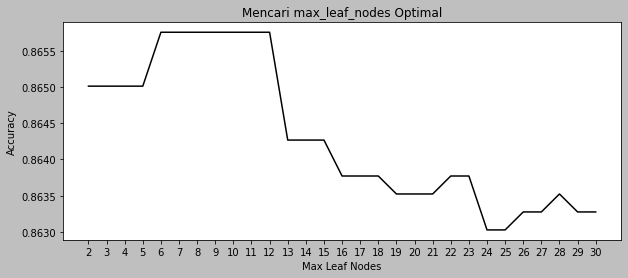

In [ ]:
accuracy = []

for k in range(2,31):
    X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.45, random_state=5)
    clf = DecisionTreeClassifier(max_leaf_nodes=k)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    accuracy.append(score)

plt.figure(figsize=(10,4))
plt.title('Mencari max_leaf_nodes Optimal')
plt.style.use("grayscale")
plt.plot(range(2,31), accuracy)
plt.xticks(range(2,31))
plt.xlabel("Max Leaf Nodes")
plt.ylabel("Accuracy")
plt.show()

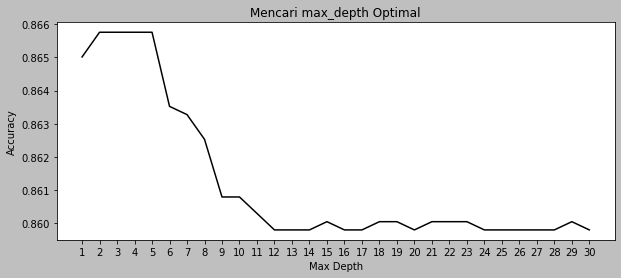

In [ ]:
accuracy = []

for k in range(1,31):
    X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.45, random_state=5)
    clf = DecisionTreeClassifier(max_depth=k)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    accuracy.append(score)

plt.figure(figsize=(10,4))
plt.style.use("grayscale")
plt.plot(range(1,31), accuracy)
plt.title('Mencari max_depth Optimal')
plt.xticks(range(1,31))
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

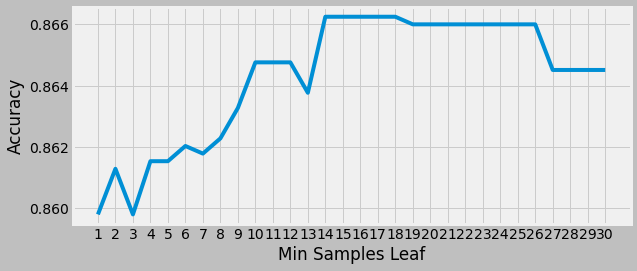

In [ ]:

accuracy = []

for k in range(1,31):
    X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.45, random_state=5)
    clf = DecisionTreeClassifier(min_samples_leaf=k)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    accuracy.append(score)

plt.figure(figsize=(10,4))
plt.style.use("fivethirtyeight")
plt.plot(range(1,31), accuracy)
plt.xticks(range(1,31))
plt.xlabel("Min Samples Leaf")
plt.ylabel("Accuracy")
plt.show()

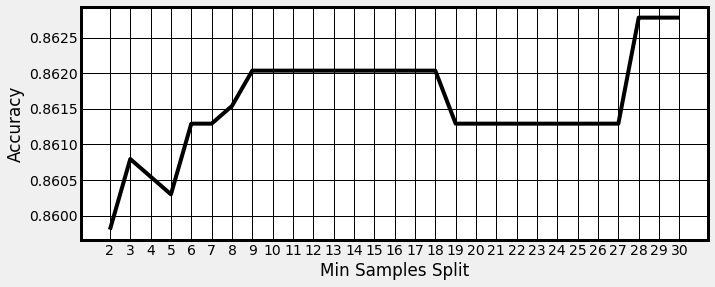

In [ ]:
accuracy = []

for k in range(2,31):
    X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.45, random_state=5)
    clf = DecisionTreeClassifier(min_samples_split=k)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    accuracy.append(score)

plt.figure(figsize=(10,4))
plt.style.use("grayscale")
plt.plot(range(2,31), accuracy)
plt.xticks(range(2,31))
plt.xlabel("Min Samples Split")
plt.ylabel("Accuracy")
plt.show()

## Eksperimen

In [ ]:
#EKSPERIMEN

max = 0
at_size = 0.0
at_rand = 0
for i in np.arange(0.05, 0.55, 0.05):
    for j in range(1,30):
        print(f'test_size: {"{:.2f}".format(i)} & random_state: {j}')
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i, random_state=j)
        clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                max_features=None, max_leaf_nodes=2, min_samples_leaf=5,
                min_samples_split=2, min_weight_fraction_leaf=0.0,
                random_state=j)
        clf = clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        if max < metrics.accuracy_score(y_test, y_pred):
            max = metrics.accuracy_score(y_test, y_pred)
            at_size = i
            at_rand = j
        print(f'Accuracy: {"{:.4f}".format(metrics.accuracy_score(y_test, y_pred))}')

print("")
print(f'Akurasi tertinggi: {"{:.4f}".format(max)} pada test_size: {at_size} & random_state: {at_rand}')

test_size: 0.05 & random_state: 1
Accuracy: 0.8571
test_size: 0.05 & random_state: 2
Accuracy: 0.8571
test_size: 0.05 & random_state: 3
Accuracy: 0.8214
test_size: 0.05 & random_state: 4
Accuracy: 0.8549
test_size: 0.05 & random_state: 5
Accuracy: 0.8348
test_size: 0.05 & random_state: 6
Accuracy: 0.8594
test_size: 0.05 & random_state: 7
Accuracy: 0.8504
test_size: 0.05 & random_state: 8
Accuracy: 0.8683
test_size: 0.05 & random_state: 9
Accuracy: 0.8549
test_size: 0.05 & random_state: 10
Accuracy: 0.8527
test_size: 0.05 & random_state: 11
Accuracy: 0.8482
test_size: 0.05 & random_state: 12
Accuracy: 0.8549
test_size: 0.05 & random_state: 13
Accuracy: 0.8616
test_size: 0.05 & random_state: 14
Accuracy: 0.8393
test_size: 0.05 & random_state: 15
Accuracy: 0.8616
test_size: 0.05 & random_state: 16
Accuracy: 0.8616
test_size: 0.05 & random_state: 17
Accuracy: 0.8772
test_size: 0.05 & random_state: 18
Accuracy: 0.8326
test_size: 0.05 & random_state: 19
Accuracy: 0.8862
test_size: 0.05 & ran

In [ ]:
#EKSPERIMEN

max = 0
at_size = 0.0
at_rand = 0
at_leaf_nodes = 0
at_depth = 0
for i in np.arange(0.05, 0.55, 0.05):
    for j in range(1,30):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i, random_state=j)
        for k in range (2,10):
          for l in range (1,5):
            clf = DecisionTreeClassifier(max_leaf_nodes=k, max_depth=l)
            clf = clf.fit(X_train,y_train)
            y_pred = clf.predict(X_test)
            if max < metrics.accuracy_score(y_test, y_pred):
                max = metrics.accuracy_score(y_test, y_pred)
                at_size = i
                at_rand = j
                at_leaf_nodes = k
                at_depth = l

print("")
print(f'Akurasi tertinggi: {"{:.4f}".format(max)} pada test_size: {at_size} & random_state: {at_rand} & max_depth: {at_depth} & max_leaf_nodes: {at_leaf_nodes}')


Akurasi tertinggi: 0.9040 pada test_size: 0.05 & random_state: 27 & max_depth: 1 & max_leaf_nodes: 2


In [ ]:
#EKSPERIMEN

max = 0
at_size = 0.0
at_rand = 0
at_leaf_nodes = 0
at_depth = 0
at_min_samples_leaf = 0
at_min_samples_split = 0
for i in np.arange(0.05, 0.55, 0.05):
    for j in range(1,30):
        X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=i, random_state=j)
        for k in range (2,31):
          for l in range (1,31):
            for m in range (1,31):
              for n in range (2,31):
                clf = DecisionTreeClassifier(max_leaf_nodes=k, max_depth=l, min_samples_leaf=m, min_samples_split=n)
                clf = clf.fit(X_train,y_train)
                y_pred = clf.predict(X_test)
                if max < metrics.accuracy_score(y_test, y_pred):
                    max = metrics.accuracy_score(y_test, y_pred)
                    at_size = i
                    at_rand = j
                    at_leaf_nodes = k
                    at_depth = l
                    at_min_samples_leaf = m
                    at_min_samples_split = n

print("")
print(f'Akurasi tertinggi: {"{:.4f}".format(max)} pada test_size: {at_size} & random_state: {at_rand} & max_depth: {at_depth} & max_leaf_nodes: {at_leaf_nodes} & min_samples_leaf: {at_min_samples_leaf}& min_samples_split: {at_min_samples_split}')